# MULTIPLE LINEAR REGRESSION

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

Reading the data in

In [15]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Selecting features for regression

In [16]:
cdf= df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,9.9,6.7,196
1,2.4,11.2,7.7,221
2,1.5,6.0,5.8,136
3,3.5,12.7,9.1,255
4,3.5,12.1,8.7,244
5,3.5,11.9,7.7,230
6,3.5,11.8,8.1,232
7,3.7,12.8,9.0,255
8,3.7,13.4,9.5,267


Plotting "Emission" with respect to "EngineSize"

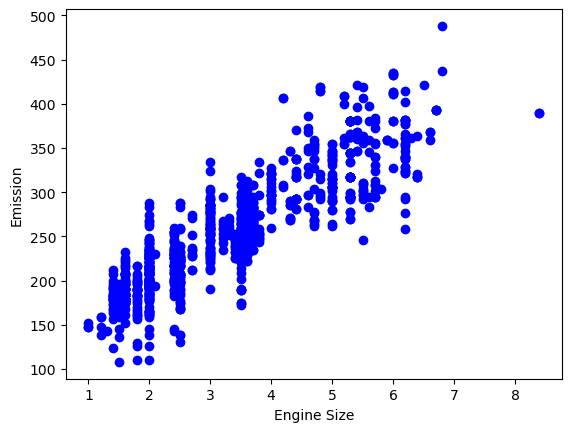

In [17]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Plotting "Emission" with respect to "FuelConsumption_City" 

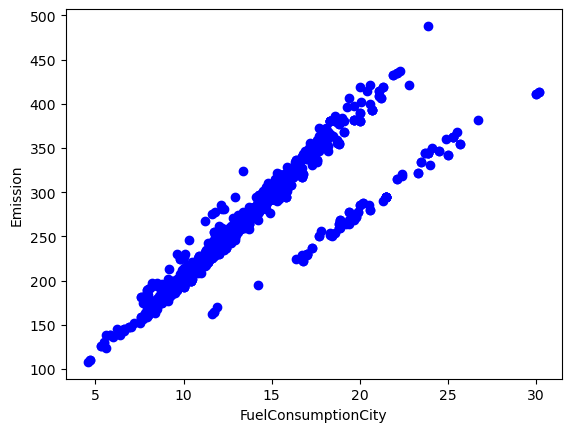

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('FuelConsumptionCity')
plt.ylabel('Emission')
plt.show()

Plotting "Emission" with respect to "FuelConsumption_Highway"

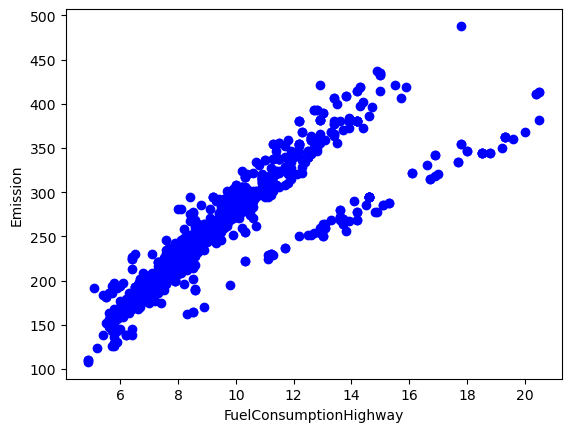

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('FuelConsumptionHighway')
plt.ylabel('Emission')
plt.show()

Training dataset using features "EngineSize", "FuelConsumptionCity", "FuelConsumptionHighway"

In [20]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

In [25]:
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print(f'Coefficients :{regr.coef_}')

Coefficients :[[19.12995311  6.94638823  2.05713019]]


As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂ 
 ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

Solving the model parameters analytically using closed-form equations
Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [30]:
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
prediction=regr.predict(test_x)


## Calculating Accuracy of the Model
Explained variance regression score:
Let  𝑦̂ 
  be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦}
 
The best possible score is 1.0, the lower values are worse.

In [29]:
mse=np.mean((prediction-test_y)**2)
vs=regr.score(test_x,test_y)
print(f'Mean Squared Error[MSE]: {mse}\nVariance Score: {vs}')

Mean Squared Error[MSE]: 514.2734716151421
Variance Score: 0.857458620952797


### CONCLUSION

Since, the variance score is closer to 1.0, this model has good accuracy.
